In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [13]:
os.chdir('/Users/hanliyang/Documents/GitHub/Parkinson-Prediagnosis')

# Patient, nonP Data Graph Comparison 

## To verify characteristic consistency

### Patient 1 session 1 Non_FoG vs. FoG

In [14]:
df_p1v1_FoG = 'Computer Vision/Results/p/p1v1/df_p1v1_FoG.csv'
df_p1v1_nonFoG = 'Computer Vision/Results/p/p1v1/df_p1v1_nonFoG.csv'

df1 = pd.read_csv(df_p1v1_FoG)
df2 = pd.read_csv(df_p1v1_nonFoG)


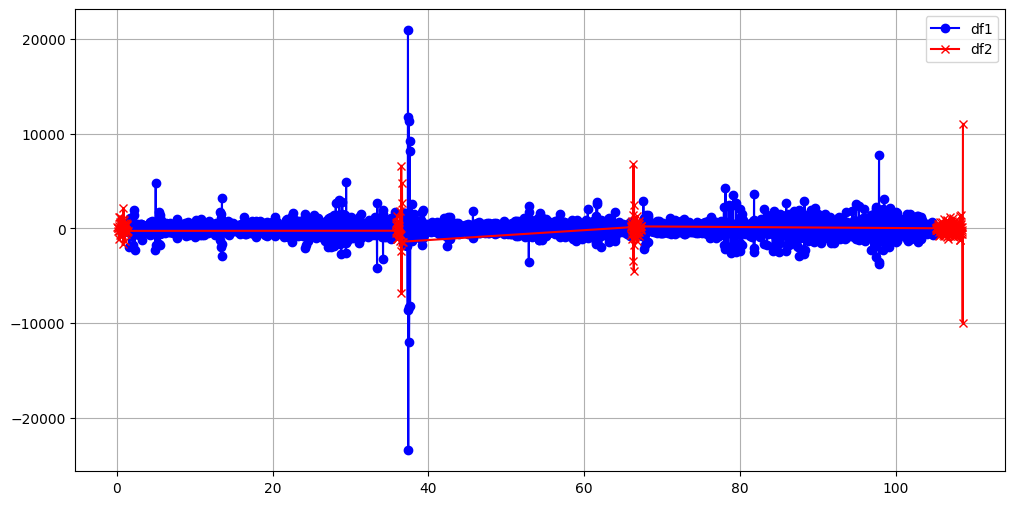

In [15]:
# Graph Analysis of Fog vs Non_fog

x_axis = 'frame_time'
y_axis = 'linear_acceleration'

plt.figure(figsize = (12,6))

plt.plot(df1[x_axis], df1[y_axis], label = 'df1', color = 'blue', marker = 'o')
plt.plot(df2[x_axis], df2[y_axis], label = 'df2', color = 'red', marker = 'x')

plt.legend()
plt.grid(True)
plt.show()

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            3039 non-null   float64
 1   frame_time           3039 non-null   float64
 2   index                3039 non-null   int64  
 3   right_ankle_x        3039 non-null   float64
 4   right_ankle_y        3039 non-null   float64
 5   right_knee_x         3039 non-null   float64
 6   right_knee_y         3039 non-null   float64
 7   right_hip_x          3039 non-null   float64
 8   right_hip_y          3039 non-null   float64
 9   magnitude1           3039 non-null   float64
 10  magnitude2           3039 non-null   float64
 11  angle_deg            3039 non-null   float64
 12  angular_velocity     3039 non-null   float64
 13  linear_acceleration  3039 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 332.5 KB


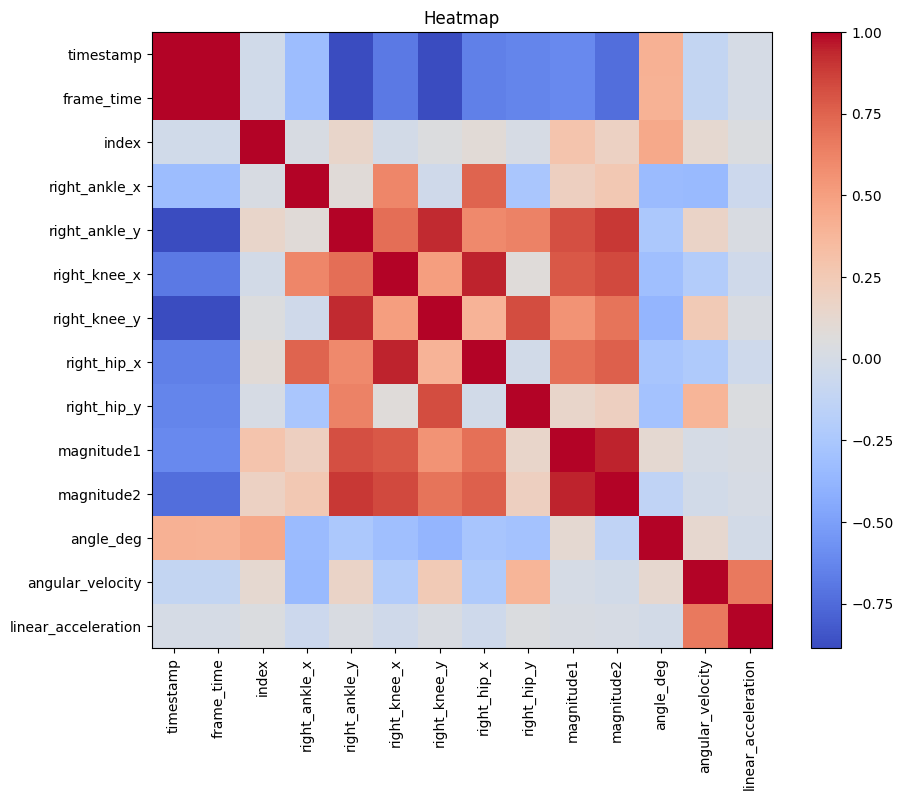

In [17]:
# Heatmap analysis
# Drop columns that have string or object
#column_index = [0,16,13]
#df2 = df2.drop(df2.columns[column_index], axis = 1)

# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Plotting the heatmap
plt.figure(figsize = (10,8))
plt.imshow(correlation_matrix, cmap = 'coolwarm', interpolation='none', aspect='auto')
plt.colorbar()

# Add labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation = 90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Heatmap')
plt.show()

### Patient Data vs. Patient Data
p1v1 vs p1v2

In [18]:
df_p1v1 = pd.read_csv('Computer Vision/Results/p/p1v1/p1v1_results.csv')
df_p1v2 = pd.read_csv('Computer Vision/Results/p/p1v2/p1v2_results.csv')

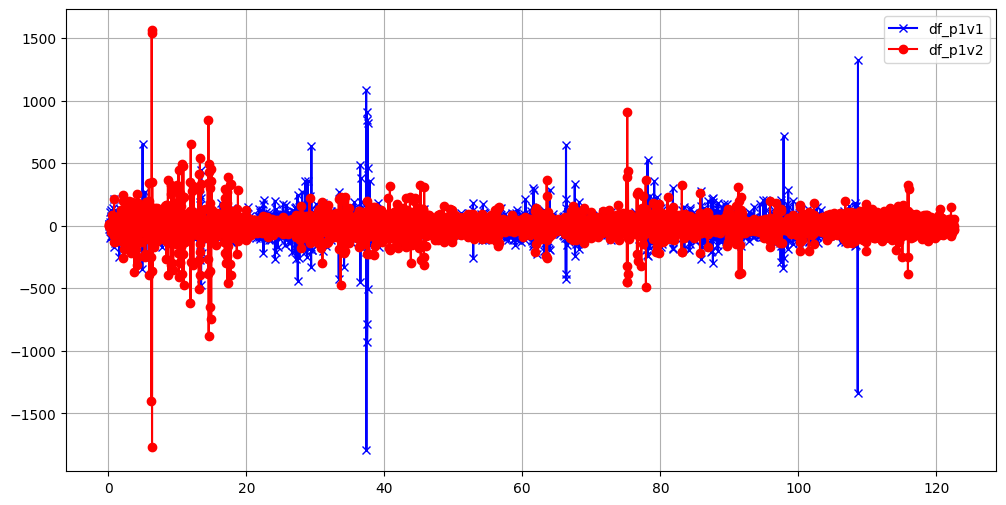

In [19]:
x_axis = 'frame_time'
y_axis = 'linear_acceleration'

plt.figure(figsize = (12,6))

plt.plot(df_p1v1[x_axis], df_p1v1[y_axis], label = 'df_p1v1', color = 'blue', marker = 'x')
plt.plot(df_p1v2[x_axis], df_p1v2[y_axis], label = 'df_p1v2', color = 'red', marker = 'o')

plt.legend()
plt.grid(True)
plt.show()

### Normal People Data 
np1_1 vs np1_2

In [20]:
df_np1v1 = pd.read_csv('Computer Vision/Results/np/np1v1_results.csv')
df_np1v2 = pd.read_csv('Computer Vision/Results/np/np1v2_results.csv')

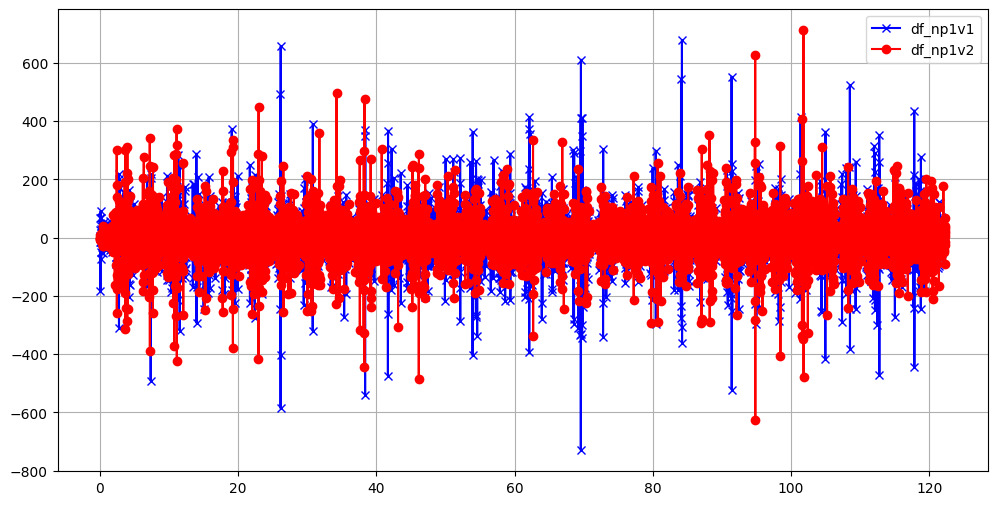

In [21]:
x_axis = 'frame_time'
y_axis = 'linear_acceleration'

plt.figure(figsize = (12,6))

plt.plot(df_np1v1[x_axis], df_np1v1[y_axis], label = 'df_np1v1', color = 'blue', marker = 'x')
plt.plot(df_np1v2[x_axis], df_np1v2[y_axis], label = 'df_np1v2', color = 'red', marker = 'o')

plt.legend()
plt.grid(True)
plt.show()

### Normal Data vs. Patient Data 
np1v2 vs p1v2

In [22]:
df_p1v2 = pd.read_csv('Computer Vision/Results/p/p1v2/p1v2_results.csv') #patient
df_np1v2 = pd.read_csv('Computer Vision/Results/np/np1v2_results.csv') #normal

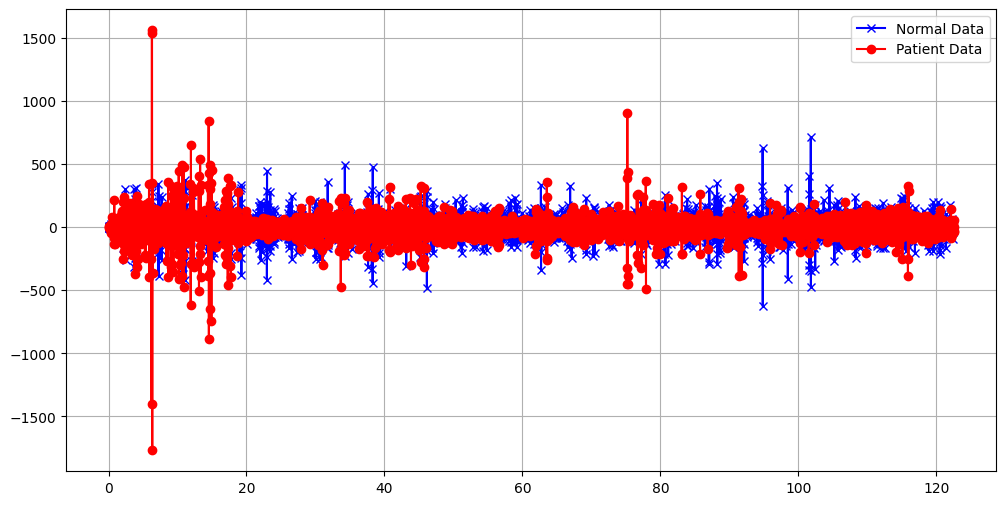

In [23]:
x_axis = 'frame_time'
y_axis = 'linear_acceleration'

plt.figure(figsize = (12,6))

plt.plot(df_np1v2[x_axis], df_np1v2[y_axis], label = 'Normal Data', color = 'blue', marker = 'x')
plt.plot(df_p1v2[x_axis], df_p1v2[y_axis], label = 'Patient Data', color = 'red', marker = 'o')

plt.legend()
plt.grid(True)
plt.show()

# overshadowing 

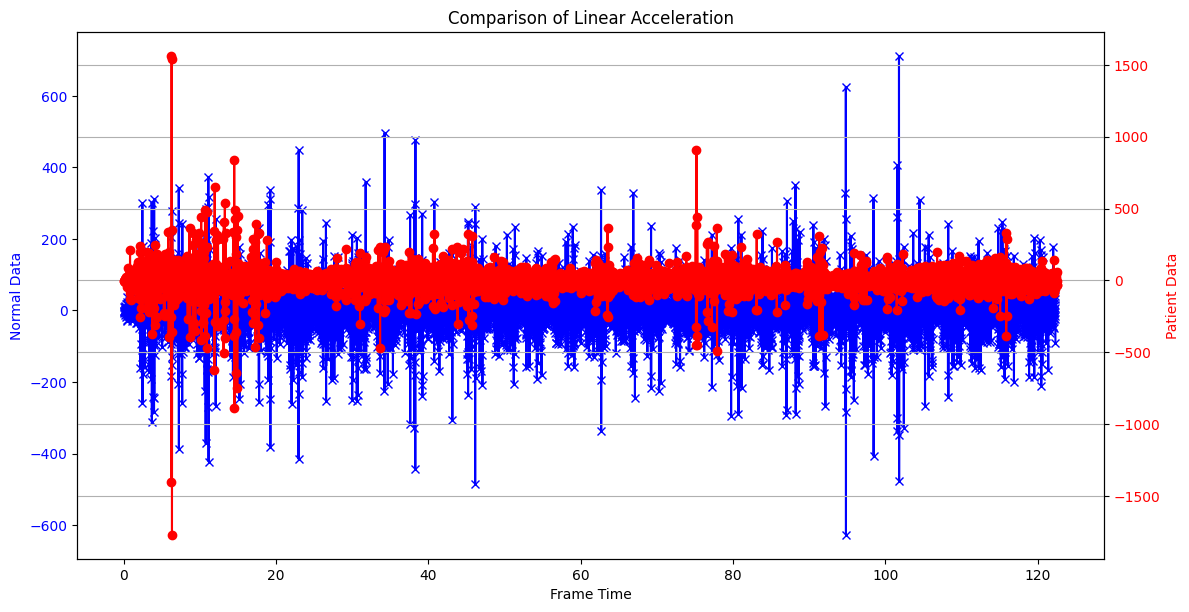

In [24]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel('Frame Time')
ax1.set_ylabel('Normal Data', color='blue')
ax1.plot(df_np1v2[x_axis], df_np1v2[y_axis], color='blue', marker='x', label='Normal Data')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Patient Data', color='red')
ax2.plot(df_p1v2[x_axis], df_p1v2[y_axis], color='red', marker='o', label='Patient Data')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.title('Comparison of Linear Acceleration')
plt.grid(True)
plt.show()


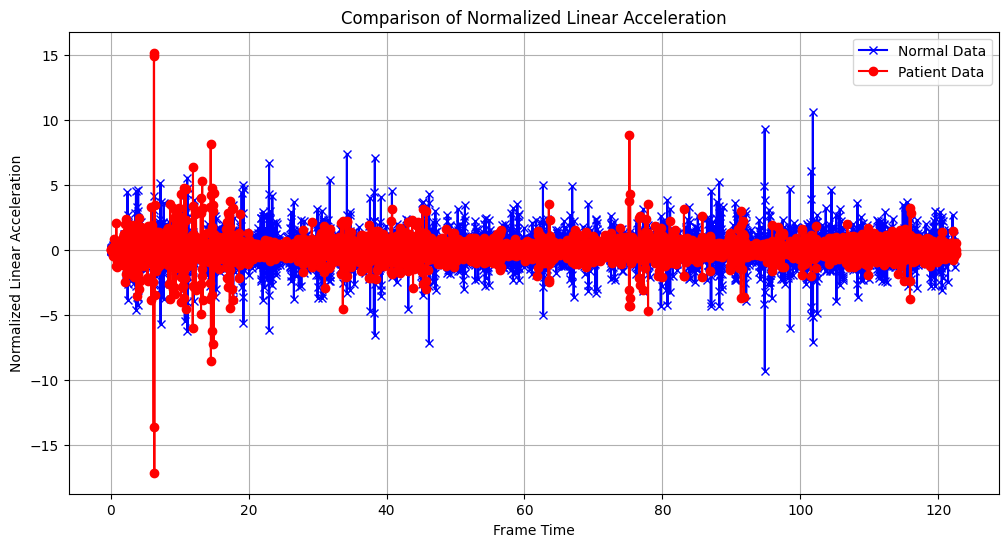

In [25]:
# Normalize the linear acceleration column for both datasets
df_p1v2['linear_acceleration_normalized'] = (df_p1v2[y_axis] - df_p1v2[y_axis].mean()) / df_p1v2[y_axis].std()
df_np1v2['linear_acceleration_normalized'] = (df_np1v2[y_axis] - df_np1v2[y_axis].mean()) / df_np1v2[y_axis].std()

plt.figure(figsize=(12,6))

plt.plot(df_np1v2[x_axis], df_np1v2['linear_acceleration_normalized'], label='Normal Data', color='blue', marker='x')
plt.plot(df_p1v2[x_axis], df_p1v2['linear_acceleration_normalized'], label='Patient Data', color='red', marker='o')

plt.xlabel('Frame Time')
plt.ylabel('Normalized Linear Acceleration')
plt.title('Comparison of Normalized Linear Acceleration')
plt.legend()
plt.grid(True)
plt.show()


## Heatmap for all_stats_angularAcceleration with other PDFEinfo parameters

### To determine correlations between Std, FoG Ratio, UPDRS-III

#### Data with outliers

In [26]:
# Graphing Heatmap for all_stats_angularAcceleration
df_allStats_withOutlier = pd.read_csv('Computer Vision/Results/stats-chosen/all_stats_angularAcceleration_fogRatio_updrsIII_npEmpty.csv')

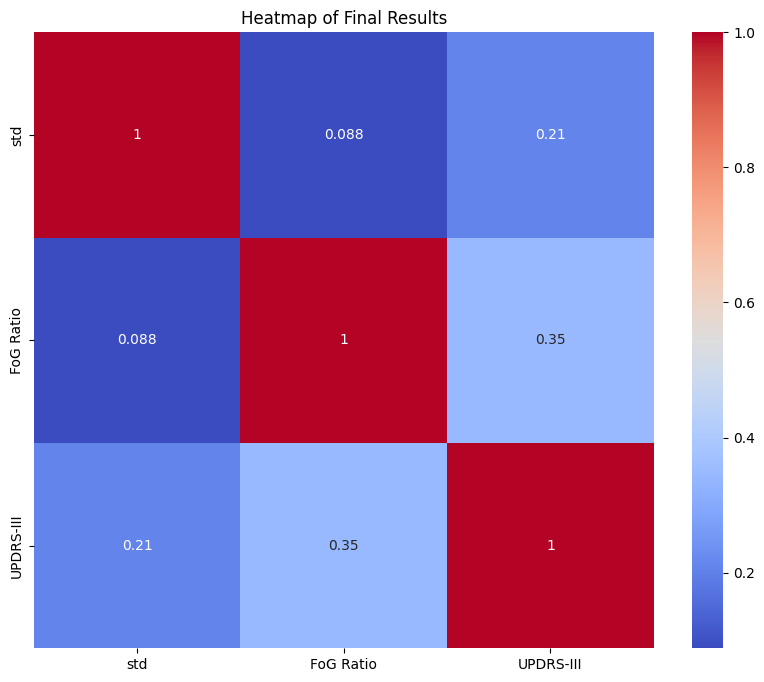

In [27]:
column_to_plot = ['std','FoG Ratio','UPDRS-III']

# Plotting the heatmap
plt.figure(figsize = (10,8))
heatmap_data = df_allStats_withOutlier[column_to_plot].corr()
sns.heatmap(heatmap_data, annot = True, cmap = 'coolwarm')
plt.title("Heatmap of Final Results")
plt.show()

#### Data without outliers

In [28]:
df_allStats_noOutlier = pd.read_csv('Computer Vision/Results/stats-chosen/all_stats_noOutliers_angularAcceleration_fogRatio_updrsIII_noEmpty.csv')

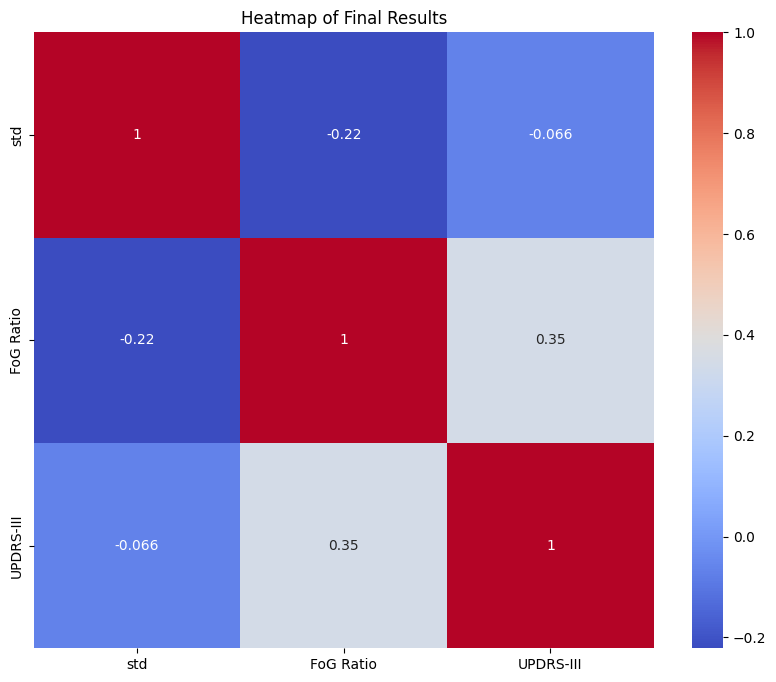

In [29]:
column_to_plot = ['std','FoG Ratio','UPDRS-III']

# Plotting the heatmap
plt.figure(figsize = (10,8))
heatmap_data = df_allStats_noOutlier[column_to_plot].corr()
sns.heatmap(heatmap_data, annot = True, cmap = 'coolwarm')
plt.title("Heatmap of Final Results")
plt.show()

#no difference between no outliers and outliers - linear correlations

### To determine correlations between all parameters

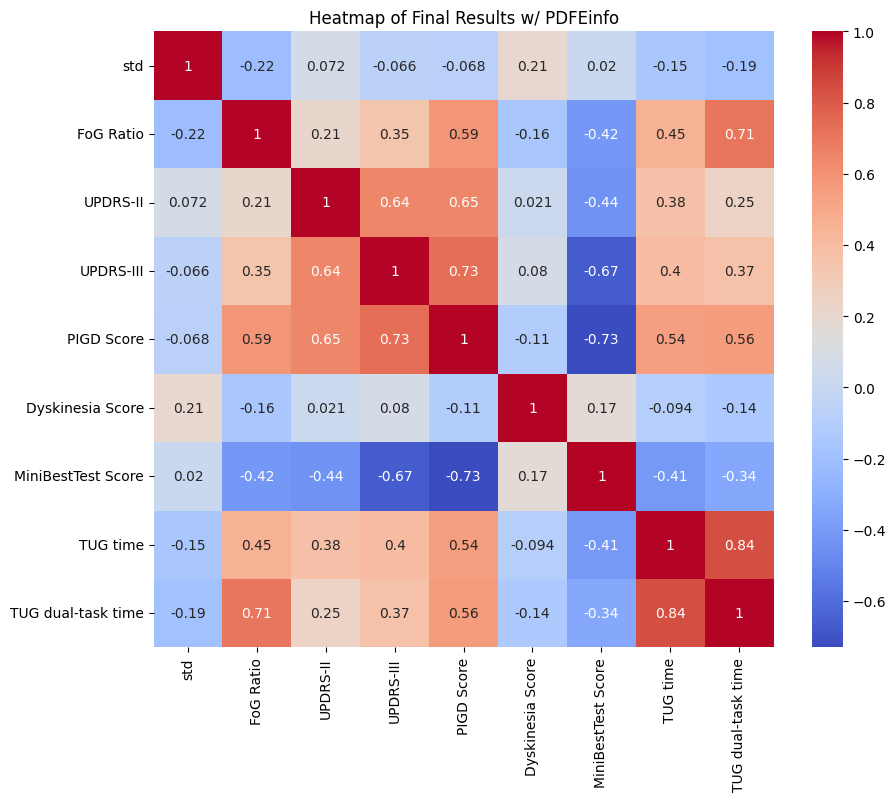

In [30]:
df_allStats_noOutlier_core = df_allStats_noOutlier.drop(['file', 'statistic', 'count', 'mean', 'min', '25%', '50%', '75%', 'max'], axis = 1)

# Plotting the heatmap
plt.figure(figsize = (10,8))
heatmap_data = df_allStats_noOutlier_core[df_allStats_noOutlier_core.columns.tolist()].corr()
sns.heatmap(heatmap_data, annot = True, cmap = 'coolwarm')
plt.title("Heatmap of Final Results w/ PDFEinfo")
plt.show()

# Algorithms determining correlations

## Basic Statistical Measures

In [31]:
# np1v2 vs. p1v2
patient_stats = df_p1v2['linear_acceleration'].describe()
print("Patient Data Statistics:")
print(patient_stats)

normal_stats = df_np1v2['linear_acceleration'].describe()
print("Normal Data Statistics:")
print(normal_stats)

Patient Data Statistics:
count    3673.000000
mean        0.005883
std       103.086550
min     -1768.904948
25%       -29.883881
50%        -0.008015
75%        31.233710
max      1561.420003
Name: linear_acceleration, dtype: float64
Normal Data Statistics:
count    7342.000000
mean        0.013047
std        67.376712
min      -627.053821
25%       -28.924871
50%        -0.541511
75%        27.514374
max       711.472604
Name: linear_acceleration, dtype: float64


In [32]:
df_p1v1 = pd.read_csv('Computer Vision/Results/p/p1v1/p1v1_results.csv') #patient
df_np1v1 = pd.read_csv('Computer Vision/Results/np/np1v1_results.csv') #normal

In [33]:
patient_stats = df_p1v1['linear_acceleration'].describe()
print("Patient Data Statistics:")
print(patient_stats)

normal_stats = df_np1v1['linear_acceleration'].describe()
print("Normal Data Statistics:")
print(normal_stats)

Patient Data Statistics:
count    3255.000000
mean        0.033415
std        97.032716
min     -1794.957389
25%       -33.511011
50%         0.627522
75%        31.732623
max      1320.504493
Name: linear_acceleration, dtype: float64
Normal Data Statistics:
count    7311.000000
mean        0.057500
std        71.020173
min      -729.699033
25%       -27.280563
50%         0.496289
75%        28.309368
max       677.486215
Name: linear_acceleration, dtype: float64


## Algorithms

### ML

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [35]:
var_input = ['std', 'FoG Ratio', 'UPDRS-II']
var_predict = ['TUG dual-task time'] 

df_ml = df_allStats_noOutlier_core[var_input + var_predict]

X = df_ml[['std']]
y = df_ml[[var_predict[0]]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

linear_model = LinearRegression()
rf_model = RandomForestRegressor()
svr_model = SVR()

# Train the model
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
#svr_model.fit(X_train, y_train)

y_pred_lm = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_lm)
print(f"Linear Regression MSE: {mse_linear}")

y_pred_rf = rf_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_linear}")

#y_prediction = svr_model.predict(X_test)
#mse_linear = mean_squared_error(y_test, y_prediction)
#print(f"SVR MSE: {mse_linear}")

Linear Regression MSE: 225.82609782418712
Random Forest MSE: 281.5026878280002


/Users/hanliyang/Documents/GitHub/Parkinson-Prediagnosis/venv/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


* Possible models to try:
    1. decisiton tree
    2. Gradient Boosting Machine
    3. KNN regression/classifier
    4. Guassian
    5. K means clustering
    6. NN

### CNN 

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import hashlib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [37]:
var_input = ['std', 'FoG Ratio', 'UPDRS-II']
var_predict = ['TUG dual-task time'] 

df_ml = df_allStats_noOutlier_core[var_input + var_predict]

X = df_ml[[var_input[0]]]
y = df_ml[[var_predict[0]]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#### Sequential model with 4 layers

In [38]:
model = Sequential()
model.add(Dense(128, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) # Output layer for regression

tf.debugging.set_log_device_placement(True)

# Compile the model
model.compile(optimizer = Adam(learning_rate=0.01), loss= 'mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs = 300, batch_size = 32, verbose = 2) #TODO: Change epoch for less loss

# Predict values and accuracy
y_prediction = model.predict(X_test)
mseNN = mean_squared_error(y_test, y_prediction)
print(f"NN MSE: {mseNN}")

# Save the model    
model_name = f'CV_NNmodel_{var_input[0]}_to_{var_predict[0]}.h5'
model_folder_path = os.path.join('Computer Vision/models/',model_name)
model.save(model_folder_path)

/Users/hanliyang/Documents/GitHub/Parkinson-Prediagnosis/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
2/2 - 0s - 241ms/step - loss: 787.6232
Epoch 2/300
2/2 - 0s - 8ms/step - loss: 325.8620
Epoch 3/300
2/2 - 0s - 6ms/step - loss: 472.6800
Epoch 4/300
2/2 - 0s - 9ms/step - loss: 242.0619
Epoch 5/300
2/2 - 0s - 10ms/step - loss: 183.5993
Epoch 6/300
2/2 - 0s - 11ms/step - loss: 215.5266
Epoch 7/300
2/2 - 0s - 10ms/step - loss: 189.8253
Epoch 8/300
2/2 - 0s - 11ms/step - loss: 180.2404
Epoch 9/300
2/2 - 0s - 12ms/step - loss: 189.1472
Epoch 10/300
2/2 - 0s - 10ms/step - loss: 192.6347
Epoch 11/300
2/2 - 0s - 15ms/step - loss: 182.4677
Epoch 12/300
2/2 - 0s - 10ms/step - loss: 174.3020
Epoch 13/300
2/2 - 0s - 14ms/step - loss: 180.5910
Epoch 14/300
2/2 - 0s - 11ms/step - loss: 184.4494
Epoch 15/300
2/2 - 0s - 10ms/step - loss: 178.0285
Epoch 16/300
2/2 - 0s - 13ms/step - loss: 178.5535
Epoch 17/300
2/2 - 0s - 9ms/step - loss: 177.9894
Epoch 18/300
2/2 - 0s - 9ms/step - loss: 179.4135
Epoch 19/300
2/2 - 0s - 8ms/step - loss: 176.5460
Epoch 20/300
2/2 - 0s - 9ms/step - loss: 175.

NN MSE: 221.43626435334872


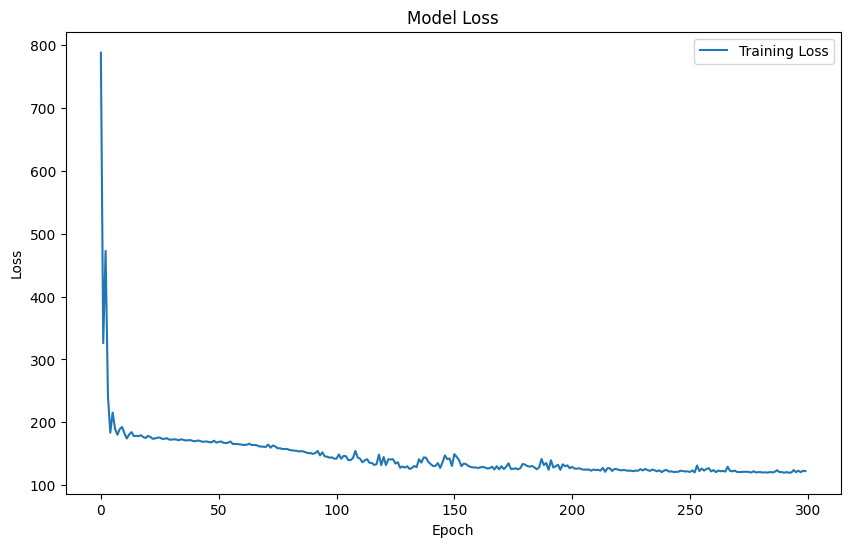

In [39]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [40]:
model = load_model('Computer Vision/models/cnn_version1.h5')

#mean_fog = X_train['FoG Ratio'].mean()
#mean_updrsii = X_train['UPDRS-II'].mean()

# Example new data
# Ensure that the new data matches the feature structure used during training
new_data = pd.DataFrame({
    'std': [83.57921565783211],  # Replace with actual value
    #'FoG Ratio': [mean_fog],  # Replace with actual value
    #'UPDRS-II': [mean_updrsii]  # Replace with actual value
})

# Prepare the input for prediction
new_input = new_data.values  # Convert DataFrame to numpy array

# Make predictions
predictions = model.predict(new_input)
print(predictions)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'Computer Vision/models/cnn_version1.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

#### Sequeuntial model with 4 layers, batch normalization, dropout

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim = X_train.shape[1], activation = 'relu', name = 'input_layer'))
model.add(BatchNormalization(name='batch1')) # better generalization of data
model.add(Dropout(0.3, name='dropout1')) # Helps with overfitting

model.add(Dense(64, activation = 'relu', name = 'hidden_layer_1'))
model.add(BatchNormalization(name='batch2'))
model.add(Dropout(0.3, name='dropout2'))

model.add(Dense(32, activation = 'relu', name = 'hidden_layer_2'))

model.add(Dense(1)) # Output layer for regression

tf.debugging.set_log_device_placement(True)

# Compile the model
model.compile(optimizer = Adam(learning_rate=0.01), loss= 'mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs = 300, batch_size = 32, verbose = 2) #TODO: Change epoch for less loss

# Predict values and accuracy
y_prediction = model.predict(X_test)
mseNN = mean_squared_error(y_test, y_prediction)
print(f"NN MSE: {mseNN}")

# Save the model    
model_name = f'CV_NNmodel_{var_input[0]}_to_{var_predict[0]}_batchNormalDropout.h5'
model_folder_path = os.path.join('Computer Vision/models/',model_name)
model.save(model_folder_path)

Epoch 1/300


/Users/hanliyang/Documents/GitHub/Parkinson-Prediagnosis/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 - 1s - 411ms/step - loss: 395.8214
Epoch 2/300
2/2 - 0s - 7ms/step - loss: 352.3621
Epoch 3/300
2/2 - 0s - 7ms/step - loss: 305.6783
Epoch 4/300
2/2 - 0s - 7ms/step - loss: 270.6920
Epoch 5/300
2/2 - 0s - 7ms/step - loss: 233.8955
Epoch 6/300
2/2 - 0s - 7ms/step - loss: 205.1433
Epoch 7/300
2/2 - 0s - 7ms/step - loss: 163.5140
Epoch 8/300
2/2 - 0s - 6ms/step - loss: 155.5350
Epoch 9/300
2/2 - 0s - 9ms/step - loss: 126.4710
Epoch 10/300
2/2 - 0s - 8ms/step - loss: 137.7351
Epoch 11/300
2/2 - 0s - 8ms/step - loss: 144.3648
Epoch 12/300
2/2 - 0s - 7ms/step - loss: 126.5475
Epoch 13/300
2/2 - 0s - 7ms/step - loss: 124.1833
Epoch 14/300
2/2 - 0s - 6ms/step - loss: 153.7931
Epoch 15/300
2/2 - 0s - 6ms/step - loss: 155.8952
Epoch 16/300
2/2 - 0s - 6ms/step - loss: 127.7190
Epoch 17/300
2/2 - 0s - 7ms/step - loss: 147.7286
Epoch 18/300
2/2 - 0s - 6ms/step - loss: 128.8736
Epoch 19/300
2/2 - 0s - 7ms/step - loss: 127.8431
Epoch 20/300
2/2 - 0s - 6ms/step - loss: 139.3228
Epoch 21/300
2/2 - 

NN MSE: 219.95087675565662


#### Sequential model with 5 layers

In [ ]:
model = Sequential()

model.add(Dense(256, input_dim = X_train.shape[1], activation = 'relu', name = 'input_layer'))
model.add(Dense(128, activation = 'relu', name = 'hidden_layer_1'))
model.add(Dense(64, activation = 'relu', name = 'hidden_layer_2'))
model.add(Dense(32, activation = 'relu', name = 'hidden_layer_3'))
model.add(Dense(1)) # Output layer for regression

tf.debugging.set_log_device_placement(True)

# Compile the model
model.compile(optimizer = Adam(learning_rate=0.01), loss= 'mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs = 300, batch_size = 32, verbose = 2) #TODO: Change epoch for less loss

# Predict values and accuracy
y_prediction = model.predict(X_test)
mseNN = mean_squared_error(y_test, y_prediction)
print(f"NN MSE: {mseNN}")

model_name = f'CV_NN_model_5l.h5'
model_folder_path = os.path.join('Computer Vision/models',model_name)
model.save(model_folder_path)

Epoch 1/300


/Users/hanliyang/Documents/GitHub/Parkinson-Prediagnosis/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 - 1s - 355ms/step - loss: 434.7739
Epoch 2/300
2/2 - 0s - 6ms/step - loss: 281.4910
Epoch 3/300
2/2 - 0s - 7ms/step - loss: 180.3535
Epoch 4/300
2/2 - 0s - 6ms/step - loss: 187.6881
Epoch 5/300
2/2 - 0s - 6ms/step - loss: 210.5442
Epoch 6/300
2/2 - 0s - 7ms/step - loss: 196.7768
Epoch 7/300
2/2 - 0s - 7ms/step - loss: 176.3306
Epoch 8/300
2/2 - 0s - 6ms/step - loss: 180.8677
Epoch 9/300
2/2 - 0s - 7ms/step - loss: 179.1536
Epoch 10/300
2/2 - 0s - 7ms/step - loss: 175.1903
Epoch 11/300
2/2 - 0s - 6ms/step - loss: 179.6767
Epoch 12/300
2/2 - 0s - 7ms/step - loss: 186.2243
Epoch 13/300
2/2 - 0s - 6ms/step - loss: 179.6740
Epoch 14/300
2/2 - 0s - 7ms/step - loss: 178.9805
Epoch 15/300
2/2 - 0s - 7ms/step - loss: 179.1035
Epoch 16/300
2/2 - 0s - 6ms/step - loss: 188.6250
Epoch 17/300
2/2 - 0s - 7ms/step - loss: 172.9884
Epoch 18/300
2/2 - 0s - 6ms/step - loss: 187.5552
Epoch 19/300
2/2 - 0s - 7ms/step - loss: 180.7163
Epoch 20/300
2/2 - 0s - 7ms/step - loss: 184.4585
Epoch 21/300
2/2 - 

NN MSE: 205.5808212531996


#### Sequential model with 5 layers, swish activation

In [ ]:
model = Sequential()

model.add(Dense(256, input_dim = X_train.shape[1], name = 'input_layer'))
model.add(tf.keras.layers.Activation('swish'))
model.add(Dense(128, name = 'hidden_layer_1'))
model.add(tf.keras.layers.Activation('swish'))
model.add(Dense(64, name = 'hidden_layer_2'))
model.add(tf.keras.layers.Activation('swish'))
model.add(Dense(32, name = 'hidden_layer_3'))
model.add(tf.keras.layers.Activation('swish'))
model.add(Dense(1)) # Output layer for regression

tf.debugging.set_log_device_placement(True)

# Compile the model
model.compile(optimizer = Adam(learning_rate=0.01), loss= 'mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs = 300, batch_size = 32, verbose = 2) #TODO: Change epoch for less loss

# Predict values and accuracy
y_prediction = model.predict(X_test)
mseNN = mean_squared_error(y_test, y_prediction)
print(f"NN MSE: {mseNN}")

model_name = f'CV_NN_model_5lSwish.h5'
model_folder_path = os.path.join('Computer Vision/models',model_name)
model.save(model_folder_path)

NameError: name 'X_train' is not defined

#### Sequential model with 5 layers, LSTM

In [42]:
model = Sequential()

model.add(LSTM(256, input_dim = X_train.shape[1], name = 'input_layer'))
model.add(LSTM(128, name = 'hidden_layer_1'))
model.add(LSTM(64, name = 'hidden_layer_2'))
model.add(LSTM(32, name = 'hidden_layer_3'))
model.add(Dense(1)) # Output layer for regression

tf.debugging.set_log_device_placement(True)

# Compile the model
model.compile(optimizer = Adam(learning_rate=0.01), loss= 'mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs = 300, batch_size = 32, verbose = 2) #TODO: Change epoch for less loss

# Predict values and accuracy
y_prediction = model.predict(X_test)
mseNN = mean_squared_error(y_test, y_prediction)
print(f"NN MSE: {mseNN}")

model_name = f'CV_NN_model_lstm.h5'
model_folder_path = os.path.join('Computer Vision/models',model_name)
model.save(model_folder_path)

ValueError: Input 0 of layer "input_layer" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 1)